In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from sodapy import Socrata
import gmaps

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



### Police Station vs Crime Heatmap
Find crime hotspots as it relates to police office locations

I ploted a map of police stations and then layered in a heat map of crime. In the heatmap it does look like there could be a need for an additional police station in the loop where there is more volume of crime occuring. 

In [2]:
client_hw = Socrata("data.cityofchicago.org", API Key)
results_police_stations_hw = client_hw.get("9rg7-mz9y")
results_police_stations_hw
# https://data.cityofchicago.org/resource/9rg7-mz9y.json
# Convert to pandas DataFrame
results_df_hw = pd.DataFrame(results_police_stations_hw)

results_df_hw.head()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,address,city,district,district_name,...,latitude,location,longitude,phone,state,tty,website,x_coordinate,y_coordinate,zip
0,9,21194,12,330,40,34,1718 S State St,Chicago,1,Central,...,41.85837259,"{'type': 'Point', 'coordinates': [-87.62735617...",-87.62735617,312-745-4290,IL,312-745-3693,http://home.chicagopolice.org/community/distri...,1176569.052,1891771.704,60616
1,31,21554,17,487,59,70,7808 S Halsted St,Chicago,6,Gresham,...,41.75213684,"{'type': 'Point', 'coordinates': [-87.64422890...",-87.64422891,312-745-3617,IL,312-745-3639,http://home.chicagopolice.org/community/distri...,1172283.013,1853022.646,60620
2,14,21184,36,36,28,28,3151 W Harrison St,Chicago,11,Harrison,...,41.87358229,"{'type': 'Point', 'coordinates': [-87.70548812...",-87.70548813,312-746-8386,IL,312-746-5151,http://home.chicagopolice.org/community/distri...,1155244.069,1897148.755,60612
3,50,21869,20,780,48,11,5151 N Milwaukee Ave,Chicago,16,Jefferson Park,...,41.97409445,"{'type': 'Point', 'coordinates': [-87.76614884...",-87.76614884,312-742-4480,IL,312-742-4423,http://home.chicagopolice.org/community/distri...,1138480.758,1933660.473,60630
4,24,21853,46,242,9,10,6464 N Clark St,Chicago,24,Rogers Park,...,41.99976348,"{'type': 'Point', 'coordinates': [-87.67132429...",-87.67132429,312-744-5907,IL,312-744-7603,http://home.chicagopolice.org/community/distri...,1164193.588,1943199.401,60626


In [3]:
locations_hw = pd.DataFrame(results_df_hw['latitude'], columns=['latitude']).astype(float)
locations_hw['longitude'] = results_df_hw['longitude'].astype(float)

import gmaps
import gmaps.datasets
gmaps.configure(api_key=API Key)
fig_hw = gmaps.figure()
# Assign the marker layer to a variable
markers_hw = gmaps.marker_layer(locations_hw)
# Add the layer to the map
fig_hw.add_layer(markers_hw)

In [4]:
# https://data.cityofchicago.org/resource/x2n5-8w5q.json
results_crime_hw = client_hw.get("x2n5-8w5q", limit=2000)
results_crime_hw
# Convert to pandas DataFrame
results_crime_df_hw = pd.DataFrame.from_records(results_crime_hw)
results_crime_df_hw.head()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,_iucr,_location_description,_primary_decsription,_secondary_description,arrest,...,case_,date_of_occurrence,domestic,fbi_cd,latitude,location,longitude,ward,x_coordinate,y_coordinate
0,32,22257,17,284,65,031A,SIDEWALK,ROBBERY,ARMED: HANDGUN,N,...,JB327246,2018-06-29T05:20:00.000,N,03,41.768148205,"{'latitude': '41.768148205', 'longitude': '-87...",-87.659053996,17,1168192,1858825
1,39,22616,37,611,31,0281,APARTMENT,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,Y,...,JB327321,2018-06-29T05:30:00.000,N,02,41.964258201,"{'latitude': '41.964258201', 'longitude': '-87...",-87.665208056,46,1165957,1930274
2,10,4301,1,398,5,0620,APARTMENT,BURGLARY,UNLAWFUL ENTRY,N,...,JB328433,2018-06-29T05:30:00.000,N,05,41.814563821,"{'latitude': '41.814563821', 'longitude': '-87...",-87.604481355,4,1182936,1875860
3,29,4448,34,699,36,0820,CTA GARAGE / OTHER PROPERTY,THEFT,$500 AND UNDER,N,...,JB332208,2018-06-29T05:30:00.000,N,06,41.982270338,"{'latitude': '41.982270338', 'longitude': '-87...",-87.806941262,41,1127370,1936569
4,29,4448,34,699,36,0820,CTA STATION,THEFT,$500 AND UNDER,N,...,JB328502,2018-06-29T05:30:00.000,N,06,41.982270338,"{'latitude': '41.982270338', 'longitude': '-87...",-87.806941262,41,1127370,1936569


In [5]:
crime_locations_hw = pd.DataFrame(results_crime_df_hw['latitude'], columns=['latitude']).astype(float)
crime_locations_hw['longitude'] = results_crime_df_hw['longitude'].astype(float)
cleaned_crime_locations_hw = crime_locations_hw.dropna(how='all')


heatmap_hw = gmaps.heatmap_layer(cleaned_crime_locations_hw)

fig_hw.add_layer(heatmap_hw)
fig_hw 

Figure(layout=FigureLayout(height='420px'))

### Crime vs Location type
What type of location is the most crime happening

I took the top 5 location types of where crime was happening and bumped up against the type of crime.  In my bar charts below i found the following:

* Battery was clearly the majority crime that happened in an apartment location type but when you look at residence location type there is also a significant amount of deceptive practices, burglarly, theft and other offenses
* In parking location type theft was clearly the majority of crime type that occurs
* For sidewalk loaction type battery, narcotics and robbery are the most common type of crime

In [18]:
location_description_hw = results_crime_df_hw.groupby("_location_description").count()["case_"].sort_values(ascending=False)
top_five_loc_hw = pd.DataFrame(location_description_hw.head(6))
top_five_loc_hw


,case_
_location_description,
STREET,441
RESIDENCE,318
APARTMENT,250
SIDEWALK,192
OTHER,73
PARKING LOT/GARAGE(NON.RESID.),63


In [21]:
condition_hw = (results_crime_df_hw['_location_description'] == 'STREET') | (results_crime_df_hw['_location_description'] == 'RESIDENCE') |(results_crime_df_hw['_location_description'] == 'APARTMENT') | (results_crime_df_hw['_location_description'] == 'SIDEWALK')| (results_crime_df_hw['_location_description'] == 'OTHER')| (results_crime_df_hw['_location_description'] == 'PARKING LOT/GARAGE(NON.RESID.)')
filtered_df_hw = pd.DataFrame(results_crime_df_hw[condition_hw])
filtered_df_hw.head()

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,_iucr,_location_description,_primary_decsription,_secondary_description,arrest,...,case_,date_of_occurrence,domestic,fbi_cd,latitude,location,longitude,ward,x_coordinate,y_coordinate
1,35,21546,9,247,40,0610,APARTMENT,BURGLARY,FORCIBLE ENTRY,N,...,JB327215,2018-06-28T05:30:00.000,N,05,41.749514242,"{'latitude': '41.749514242', 'longitude': '-87...",-87.599896609,8,1184388,1852167
2,32,21546,31,406,40,0910,STREET,MOTOR VEHICLE THEFT,AUTOMOBILE,N,...,JB326613,2018-06-28T05:45:00.000,N,07,41.750967358,"{'latitude': '41.750967358', 'longitude': '-87...",-87.624158809,6,1177763,1852641
3,10,4301,1,398,5,3970,RESIDENCE,INTIMIDATION,EXTORTION,N,...,JB328695,2018-06-28T06:00:00.000,N,26,41.816012995,"{'latitude': '41.816012995', 'longitude': '-87...",-87.604512613,4,1182923,1876388
4,9,4301,12,163,4,1150,RESIDENCE,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,N,...,JB328631,2018-06-28T06:00:00.000,N,11,41.818372134,"{'latitude': '41.818372134', 'longitude': '-87...",-87.620987033,3,1178425,1877210
5,14,21569,36,157,30,0820,STREET,THEFT,$500 AND UNDER,N,...,JB326282,2018-06-28T06:00:00.000,N,06,41.852471794,"{'latitude': '41.852471794', 'longitude': '-87...",-87.713645203,24,1153078,1889440


In [22]:
cleaned_df_hw = filtered_df_hw[['case_' ,'_location_description', '_primary_decsription']]
cleaned_df_hw = pd.DataFrame(cleaned_df_hw)
pivot_hw = cleaned_df_hw.pivot_table(values='case_', index='_location_description', columns='_primary_decsription',aggfunc='count')
pivot_hw.fillna(value=0,method=None)
top_five_df_hw = pd.DataFrame(pivot_hw.fillna(value=0,method=None))
top_five_df_hw

_primary_decsription,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,...,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
_location_description,,,,,,,,,,,,,,,,,,,,,
APARTMENT,0.0,20.0,81.0,31.0,5.0,24.0,12.0,17.0,0.0,0.0,...,1.0,2.0,6.0,13.0,0.0,1.0,1.0,2.0,31.0,3.0
OTHER,0.0,6.0,9.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,...,1.0,1.0,1.0,11.0,0.0,0.0,2.0,1.0,23.0,0.0
PARKING LOT/GARAGE(NON.RESID.),0.0,5.0,10.0,0.0,0.0,13.0,2.0,3.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,19.0,1.0
RESIDENCE,1.0,21.0,85.0,17.0,3.0,39.0,10.0,47.0,0.0,0.0,...,0.0,2.0,7.0,28.0,0.0,1.0,4.0,3.0,43.0,5.0
SIDEWALK,0.0,19.0,56.0,0.0,0.0,2.0,1.0,4.0,3.0,0.0,...,1.0,24.0,0.0,4.0,0.0,3.0,33.0,0.0,33.0,7.0
STREET,1.0,32.0,63.0,1.0,0.0,72.0,0.0,6.0,0.0,1.0,...,46.0,30.0,0.0,32.0,6.0,3.0,19.0,1.0,104.0,18.0


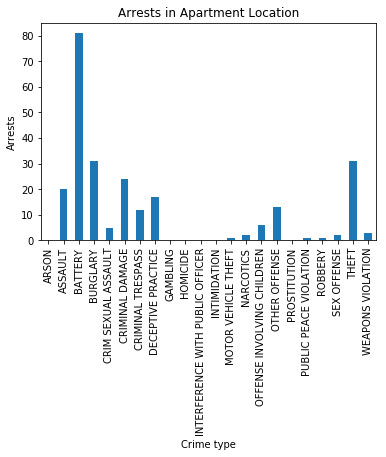

In [23]:
Apartment_hw = top_five_df_hw.iloc[0].plot.bar() 
plt.title("Arrests in Apartment Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

plt.savefig("Images/Arrests_in_apartmemt.png")


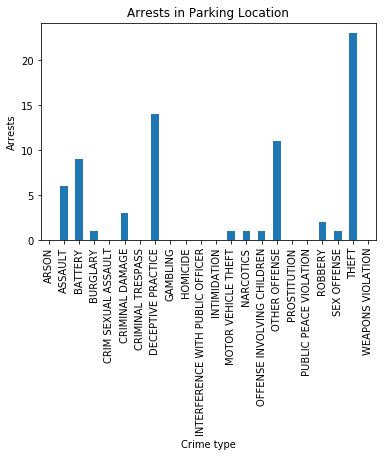

In [24]:
parking_hw = top_five_df_hw.iloc[1].plot.bar()
plt.title("Arrests in Parking Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

plt.savefig("Images/Arrests_in_parking.png")

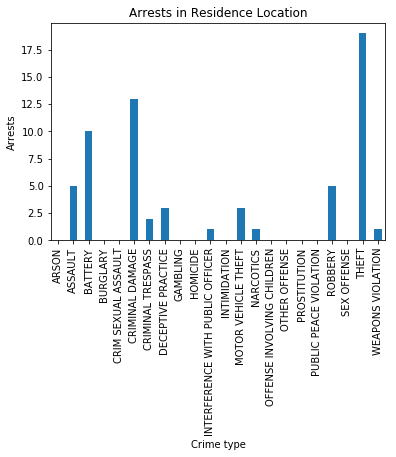

In [25]:
residence_hw = top_five_df_hw.iloc[2].plot.bar()

plt.title("Arrests in Residence Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

plt.savefig("Images/Arrests_in_residence.png")

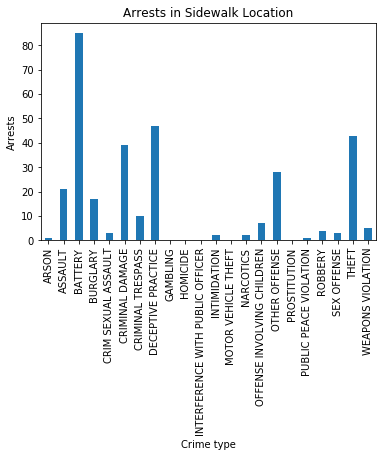

In [26]:
sidewalk_hw = top_five_df_hw.iloc[3].plot.bar()
plt.title("Arrests in Sidewalk Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

plt.savefig("Images/Arrests_in_sidewalk.png")

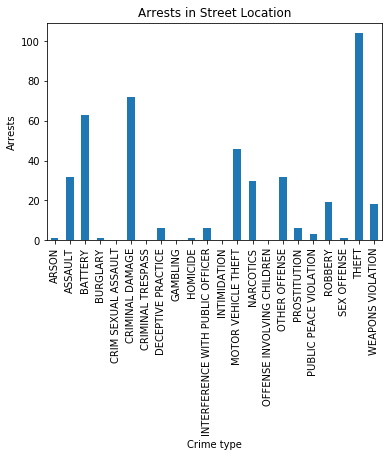

In [25]:
street = top_five_df.iloc[4].plot.bar()
plt.title("Arrests in Street Location")
plt.xlabel("Crime type")
plt.ylabel("Arrests")

plt.savefig("Images/Arrests_in_street.png")